# CANADA REFUGEE AND ASYLUM SEEKERS (2012-2022) EDA
Refugees are among the most vulnerable groups in the world. This prompted the 1951 Refugee Convention that protected the rights of refugees and asylum seekers. 

A refugee can be defined a person who, owing to a well-founded fear of being persecuted for reasons of race, religion, nationality, membership of a particular social group or political opinion, is outside the country of his nationality and is unable or, owing to such fear, unwilling to avail himself of the protection of that country- The 1951 Refugee Convention.

An asylum seeker is a person who has left their country and is seeking protection from persecution and serious human rights violations in another country, but who hasn't yet been legally recognized as a refugee and is waiting to receive a decision on their asylum claim.

Canada has been experiencing a refugee and asylum crisis over the past few years. Many people immigrate here in search of a better life for their families. Some, however, fall victims of scams and end up living in harsh conditions.

In this exploratory data analysis, we will explore the trends of refugee and asylum seekers from 2012-2022.
The main areas of EDA are: 
* Countries that most refugees and asylum seekers originate from- TOP (10)
* Countries with the least number of refugees and asylum seekers in Canada- BOTTOM (10)
* Annual trends in refugee and asylum seekers 

 - data source:unhcr.ca

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('can-stats-2012-22.csv')

In [3]:
data.shape

(1870, 5)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1870 entries, 0 to 1869
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               1870 non-null   int64 
 1   Country-of-origin  1870 non-null   object
 2   UNHCR-refugees     1870 non-null   int64 
 3   Asylum-seekers     1870 non-null   int64 
 4   total-count        1870 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 73.2+ KB


In [6]:
data.head()

,Year,Country-of-origin,UNHCR-refugees,Asylum-seekers,total-count
0,2012,Afghanistan,2609,411,3020
1,2012,Albania,1764,579,2343
2,2012,Algeria,513,284,797
3,2012,Angola,753,21,774
4,2012,Antigua and Barbuda,40,30,70


In [7]:
data.tail()

,Year,Country-of-origin,UNHCR-refugees,Asylum-seekers,total-count
1865,2022,Venezuela (Bolivarian Republic of),1497,2104,3601
1866,2022,Western Sahara,5,0,5
1867,2022,Yemen,450,452,902
1868,2022,Zambia,23,25,48
1869,2022,Zimbabwe,309,562,871


In [8]:
data.columns

Index(['Year', 'Country-of-origin', 'UNHCR-refugees', 'Asylum-seekers',
       'total-count'],
      dtype='object')

In [10]:
pd.DataFrame(data.isnull().sum(), columns=['Missing Values'])

,Missing Values
Year,0
Country-of-origin,0
UNHCR-refugees,0
Asylum-seekers,0
total-count,0


In [32]:
top_unhcr_refugees = data.groupby('Country-of-origin')['UNHCR-refugees'].sum().reset_index(name='UNHCR-refugees').sort_values(by='UNHCR-refugees', ascending=False).head(10)
top_unhcr_refugees.reset_index(drop=True)

,Country-of-origin,UNHCR-refugees
0,Colombia,108416
1,China,98586
2,Ukraine,88376
3,Pakistan,74737
4,Haiti,70956
5,Sri Lanka,66343
6,Nigeria,60554
7,Mexico,51072
8,Türkiye,42533
9,Iran (Islamic Rep. of),40881


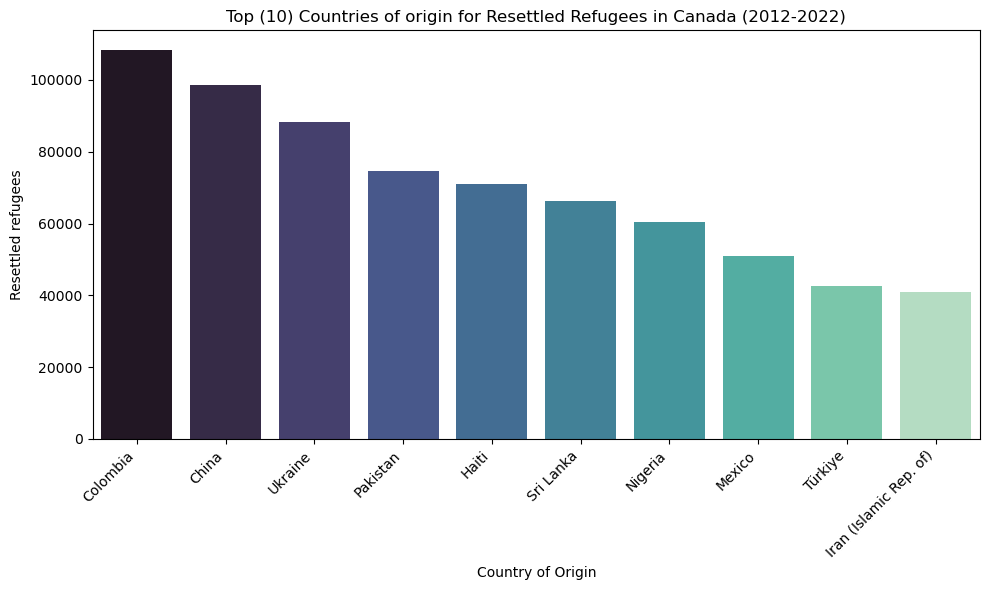

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_unhcr_refugees, x='Country-of-origin', y='UNHCR-refugees', palette='mako')

plt.xlabel('Country of Origin')
plt.ylabel('Resettled refugees')
plt.title('Top (10) Countries of origin for Resettled Refugees in Canada (2012-2022)')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [31]:
least_unhcr_refugees = data.groupby('Country-of-origin')['UNHCR-refugees'].sum().reset_index(name='UNHCR-refugees').sort_values(by='UNHCR-refugees', ascending=False).tail(10)
least_unhcr_refugees.reset_index(drop=True)

,Country-of-origin,UNHCR-refugees
0,Cyprus,12
1,Finland,10
2,Norway,10
3,Western Sahara,5
4,Austria,5
5,Iceland,5
6,Luxembourg,0
7,Cabo Verde,0
8,Bermuda,0
9,Turks and Caicos Islands,0


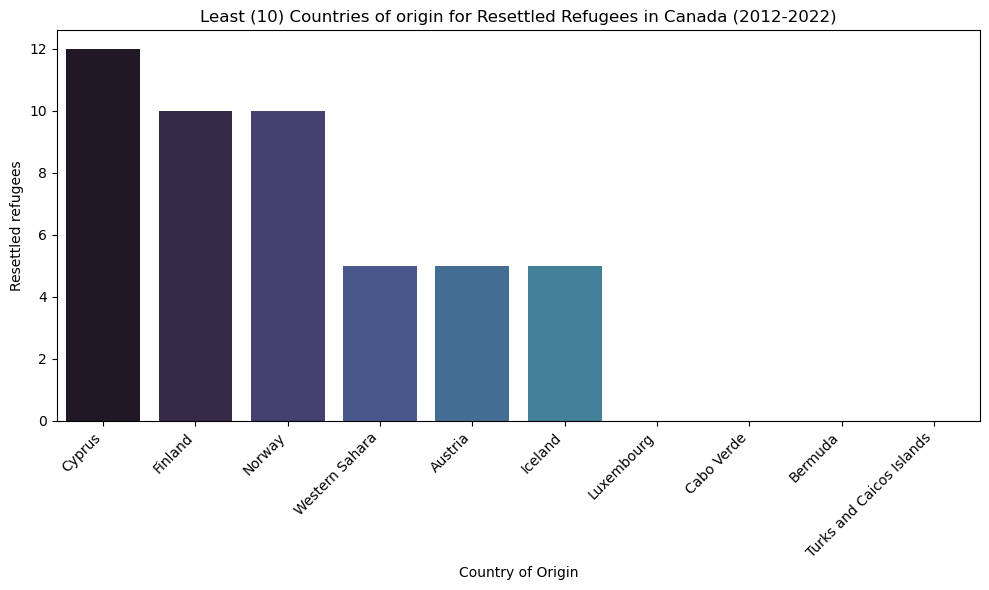

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(data=least_unhcr_refugees, x='Country-of-origin', y='UNHCR-refugees', palette='mako')

plt.xlabel('Country of Origin')
plt.ylabel('Resettled refugees')
plt.title('Least (10) Countries of origin for Resettled Refugees in Canada (2012-2022)')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [46]:
total_refugees_yrly= data.groupby('Year')['UNHCR-refugees'].sum().reset_index(name='UNHCR-refugees').sort_values(by='Year')
total_refugees_yrly.reset_index(drop=True)

,Year,UNHCR-refugees
0,2012,163751
1,2013,160347
2,2014,149164
3,2015,135890
4,2016,97322
5,2017,104768
6,2018,114101
7,2019,101757
8,2020,109214
9,2021,130125


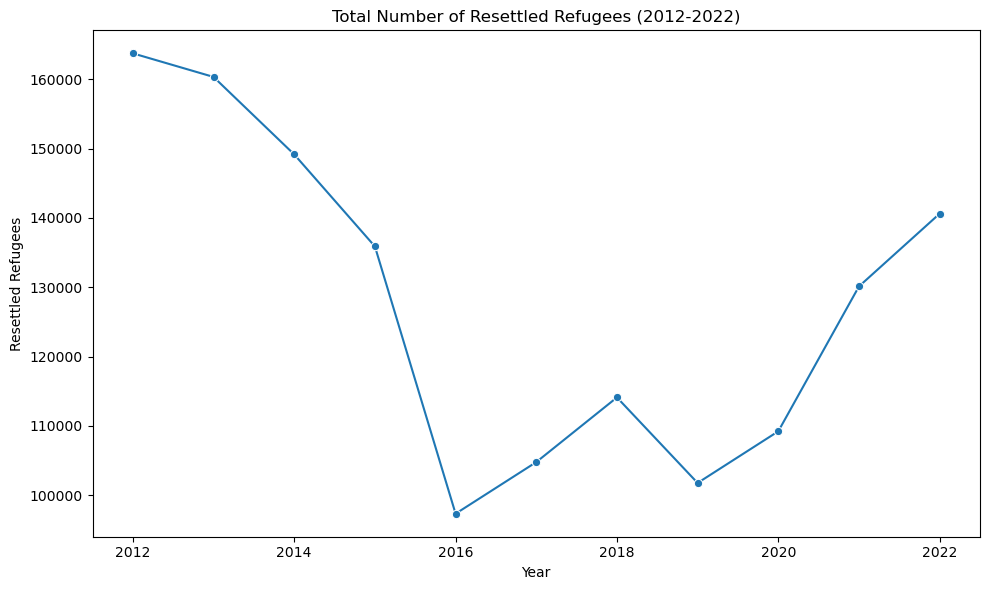

In [39]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=total_refugees_yrly, x='Year', y='UNHCR-refugees', marker='o')

plt.xlabel('Year')
plt.ylabel('Resettled Refugees')
plt.title('Total Number of Resettled Refugees (2012-2022)')

plt.tight_layout()
plt.show()

In [51]:
top_asylum_seekers = data.groupby('Country-of-origin')['Asylum-seekers'].sum().reset_index(name='Asylum-seekers').sort_values(by='Asylum-seekers', ascending=False).head(10)
top_asylum_seekers.reset_index(drop=True)

,Country-of-origin,Asylum-seekers
0,Unknown,56098
1,Nigeria,51620
2,India,48806
3,Mexico,47146
4,Haiti,40908
5,Colombia,30475
6,China,21526
7,Pakistan,19023
8,Türkiye,18166
9,Iran (Islamic Rep. of),15011


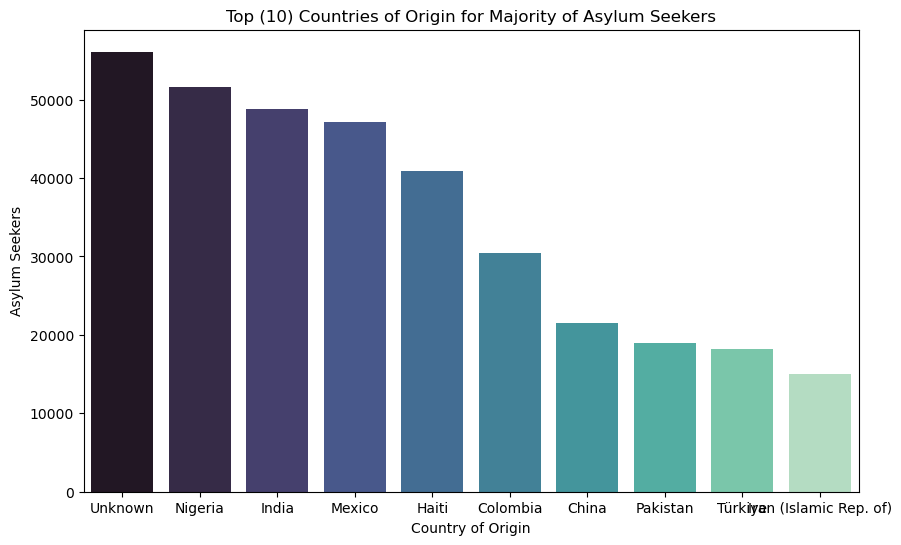

In [54]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_asylum_seekers, x='Country-of-origin', y='Asylum-seekers', palette='mako')

plt.xlabel('Country of Origin')
plt.ylabel('Asylum Seekers')
plt.title('Top (10) Countries of Origin for Majority of Asylum Seekers')

plt.tight_layout
plt.show()

In [64]:
least_asylum_seekers= data.groupby('Country-of-origin')['Asylum-seekers'].sum().reset_index(name='Asylum-seekers').sort_values(by='Asylum-seekers', ascending=False).tail(10)
least_asylum_seekers.reset_index(drop=True)

,Country-of-origin,Asylum-seekers
0,Switzerland,5
1,Lao People's Dem. Rep.,5
2,Lesotho,5
3,Luxembourg,5
4,Seychelles,5
5,Bermuda,5
6,Tibetan,0
7,Kiribati,0
8,Solomon Islands,0
9,Western Sahara,0


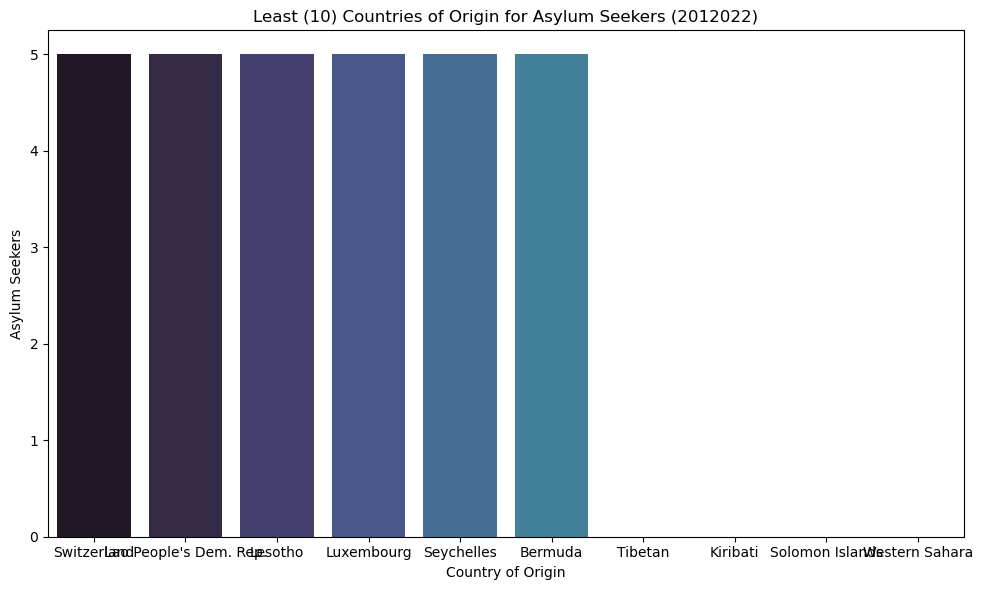

In [61]:
plt.figure(figsize=(10,6))
sns.barplot(data=least_asylum_seekers, x='Country-of-origin', y='Asylum-seekers', palette='mako')

plt.xlabel('Country of Origin')
plt.ylabel('Asylum Seekers')
plt.title('Least (10) Countries of Origin for Asylum Seekers (2012022)')

plt.tight_layout()
plt.show()

In [71]:
total_asylum_seekers_yrly=data.groupby('Year')['Asylum-seekers'].sum().reset_index(name='Asylum-seekers').sort_values(by='Year')
total_asylum_seekers_yrly.reset_index(drop=True)

,Year,Asylum-seekers
0,2012,32647
1,2013,22145
2,2014,16699
3,2015,19631
4,2016,23946
5,2017,51859
6,2018,78766
7,2019,97017
8,2020,85352
9,2021,63143


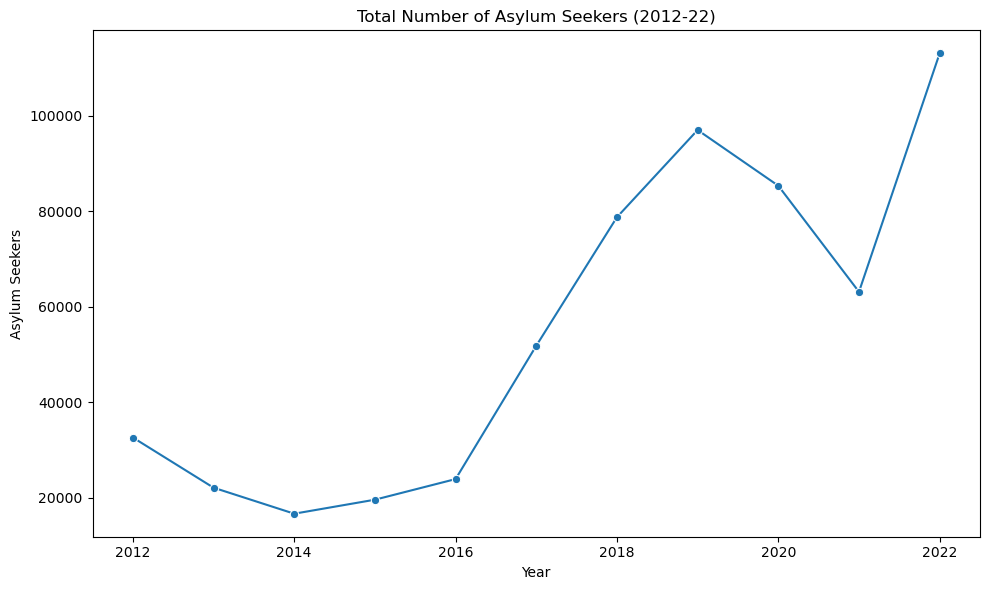

In [69]:
plt.figure(figsize=(10,6))
sns.lineplot(data=total_asylum_seekers_yrly, x='Year', y='Asylum-seekers', marker='o')

plt.xlabel('Year')
plt.ylabel('Asylum Seekers')
plt.title('Total Number of Asylum Seekers (2012-22)')

plt.tight_layout()
plt.show()

In [76]:
top_countries=data.groupby('Country-of-origin')['total-count'].sum().reset_index(name='total-count').sort_values(by='total-count', ascending=False). head(10)
top_countries.reset_index(drop=True)

,Country-of-origin,total-count
0,Colombia,138891
1,China,120112
2,Nigeria,112174
3,Haiti,111864
4,Mexico,98218
5,Pakistan,93760
6,Ukraine,91182
7,India,81757
8,Sri Lanka,75102
9,Unknown,72545


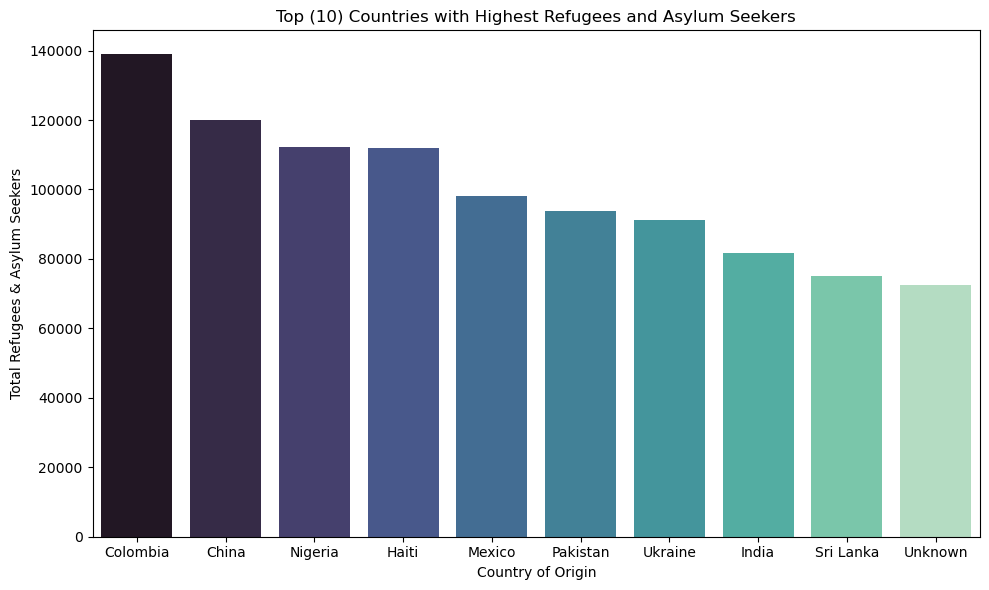

In [77]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_countries, x='Country-of-origin', y='total-count', palette='mako')

plt.xlabel('Country of Origin')
plt.ylabel('Total Refugees & Asylum Seekers')
plt.title('Top (10) Countries with Highest Refugees and Asylum Seekers')

plt.tight_layout()
plt.show()

In [80]:
least_countries=data.groupby('Country-of-origin')['total-count'].sum().reset_index(name='total-count').sort_values(by='total-count', ascending=False).tail(10)
least_countries.reset_index(drop=True)

,Country-of-origin,total-count
0,Papua New Guinea,31
1,Iceland,30
2,Lesotho,27
3,Timor-Leste,25
4,Turks and Caicos Islands,24
5,Kiribati,15
6,Cabo Verde,10
7,Luxembourg,5
8,Bermuda,5
9,Western Sahara,5


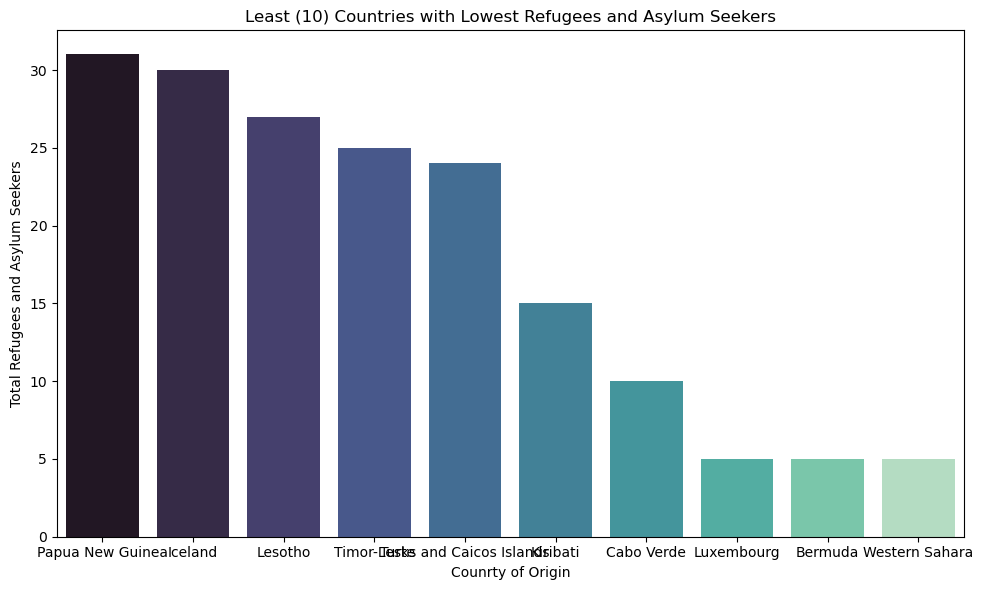

In [81]:
plt.figure(figsize=(10,6))
sns.barplot(data=least_countries, x='Country-of-origin', y='total-count', palette='mako')

plt.xlabel('Counrty of Origin')
plt.ylabel('Total Refugees and Asylum Seekers')
plt.title('Least (10) Countries with Lowest Refugees and Asylum Seekers')

plt.tight_layout()
plt.show()

In [88]:
annual_total_count=data.groupby('Year')['total-count'].sum().reset_index(name='total-count').sort_values(by='total-count')
annual_total_count.reset_index(drop=True)

,Year,total-count
0,2016,121268
1,2015,155521
2,2017,156627
3,2014,165863
4,2013,182492
5,2018,192867
6,2021,193268
7,2020,194566
8,2012,196398
9,2019,198774


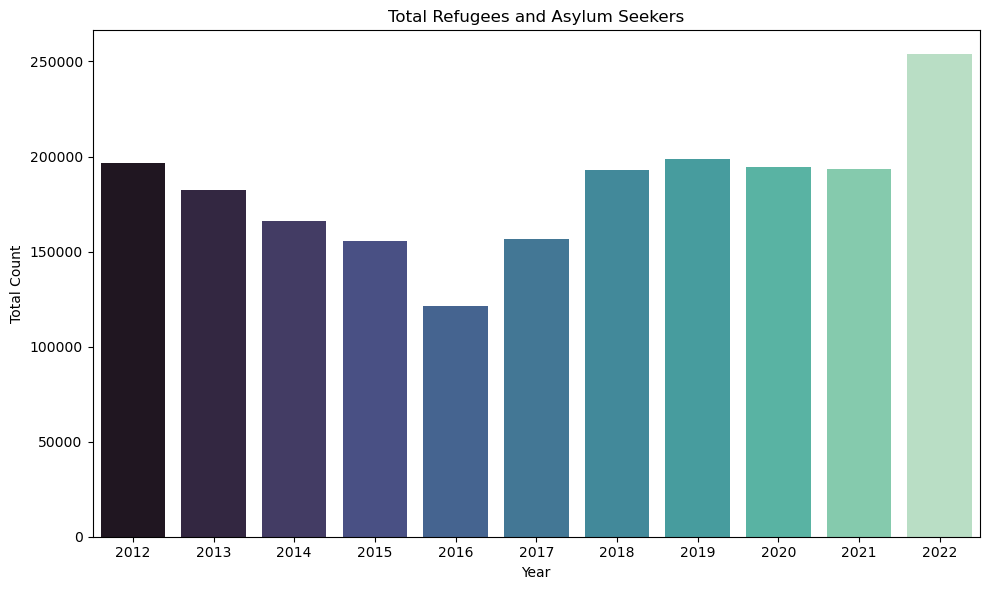

In [86]:
plt.figure(figsize=(10,6))
sns.barplot(data=annual_total_count, x='Year', y='total-count', palette='mako')

plt.xlabel('Year')
plt.ylabel('Total Count')
plt.title('Total Refugees and Asylum Seekers')

plt.tight_layout()
plt.show()

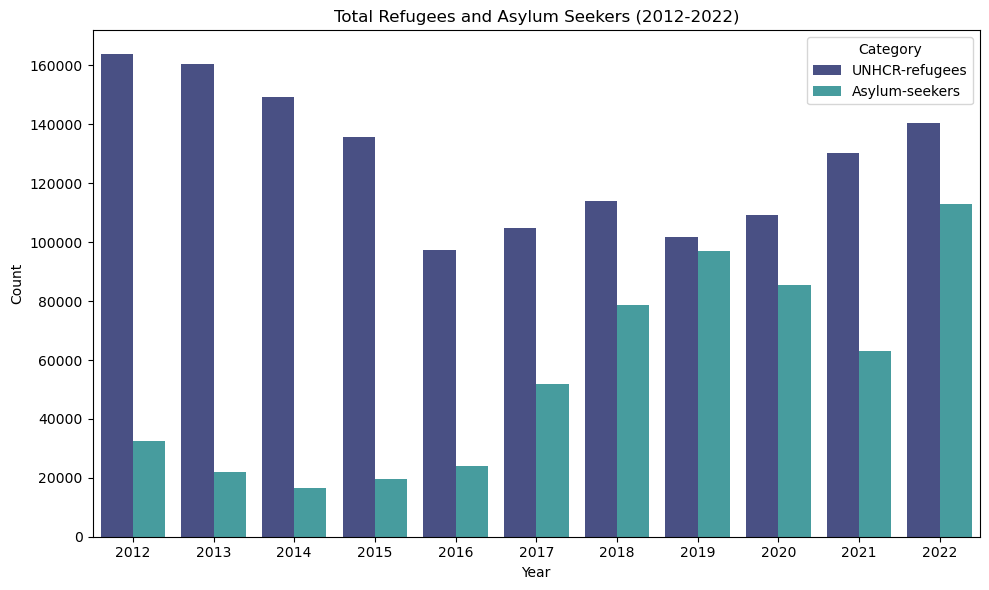

In [82]:
annual_stats=data.groupby('Year')[['UNHCR-refugees', 'Asylum-seekers']].sum().reset_index()

melted_data = pd.melt(annual_stats, id_vars=['Year'], var_name='Category', value_name='Count')

plt.figure(figsize=(10,6))
sns.barplot(data=melted_data, x='Year', y='Count', hue='Category', palette='mako')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Total Refugees and Asylum Seekers (2012-2022)')

plt.tight_layout()
plt.show()

# SUMMARY OF FINDINGS 

## UNHCR- Refugee Statisticts
The 10 leading countries that Canada has admitted most refugees are:

    Colombia (108,416)
    China (98,586)
    Ukraine (88,376)
    Pakista (74,737)
    Haiti (70,956)
    Sri Lanka (66,343)
    Nigeria (60,554)
    Mexico (51,072)
    Türkiye (42,533)
    Iran (Islamic Rep. of) (40,881)
    
The countries that Canada has admitted least number of refugees are:

    Cyprus (12)
    Finland (10)
    Norway (10)
    Western Sahara (5)
    Austria (5)
    Iceland (5)
    Luxembourg (0)
    Cabo Verde (0)
    Bermuda (0)
    Turks and Caicos Islands (0)
    
The total number of admitted refugees per year:
2012 had the highest number of resettled refugees, followed closely by 2012, 2014 and 2022
2016 had the lowest number of resettled refugees

    2012-163,751
    2013-160,347
    2014-149,164
    2015-135,890
    2016-97,322
    2017-104,768
    2018-114,101
    2019-101,757
    2020-109,214
    2021-130,125
    2022-140,621
    
 
## Asylum Seekers Statistics
The 10 leading countries that Canada has admitted most asylum seekers are:

    Unknown (56,098)
    Nigeria (51,620)
    India (48,806)
    Mexico (47,146)
    Haiti (40,908)
    Colombia (30,475)
    China (21,526)
    Pakistan (19,023)
    Türkiye (18,166)
    Iran (Islamic Rep. of) (15,011)

The countries that Canada has admitted least number of asylum seekers are:
    Switzerland (5)
    Lao People's Dem. Rep. (5)
    Lesotho (5)
    Luxembourg (5)
    Seychelles (5)
    Bermuda (5)
    Tibetan (0)
    Kiribati (0)
    Solomon Islands (0)
    Western Sahara (0)

Annually, these are the total number of asylum seekers:
2022 has the highest number of asylum seekers while 2014 has the lowest
    
    2012 (32,647)
    2013 (22,145)
    2014 (16,699)
    2015 (19,631)
    2016 (23,946)
    2017 (51,859)
    2018 (78,766)
    2019 (97,017)
    2020 (85,352)
    2021 (63,143)
    2022 (113,066)
    
## General Trend in Refugee and Asylum Seekers 
* Columbia has the highest number of refugees and asylum seekers in Canada over the 2012-2022 period - 138,891
* Papua New Guinea has the lowest number of refugees and asylum seekers- 31
* 2022 has the highest number of both refugees and asylum seekers- 253,687
* 2016 has the lowest number of both refugees and asylum seekers- 121,268